In [11]:
import os
import json
import gzip
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from urllib.request import urlopen

### Loading Data

review

In [2]:
review = []
with gzip.open(r"C:\Users\Xylon\Desktop\data200_grad\data\Toys_and_Games.json.gz") as f:
    for l in f:
        review.append(json.loads(l.strip()))
print(len(review))

review_df = pd.DataFrame.from_dict(review)
review_df.head(3)

8201231


,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,image,style
0,2.0,12,False,"09 22, 2016",A1IDMI31WEANAF,0020232233,Mackenzie Kent,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,1474502400,NaN,NaN
1,1.0,21,False,"09 18, 2016",A4BCEVVZ4Y3V3,0020232233,Jonathan Christian,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...,1474156800,NaN,NaN
2,3.0,19,True,"09 12, 2016",A2EZ9PY1IHHBX0,0020232233,unpreparedtodie,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless",1473638400,NaN,NaN


In [3]:
del review

metadata

In [ ]:
# metadata = []
# with gzip.open(r"C:\Users\Xylon\Desktop\data200_grad\data\meta_Toys_and_Games.json.gz") as f:
#     for l in f:
#         metadata.append(json.loads(l.strip()))
# print(len(metadata))
# meta_df = pd.DataFrame.from_dict(metadata)
# meta_df.head(3)

In [ ]:
# del metadata

### Exploratory Data Analysis

Distribution of Time

Text(0.5, 0, 'Year')

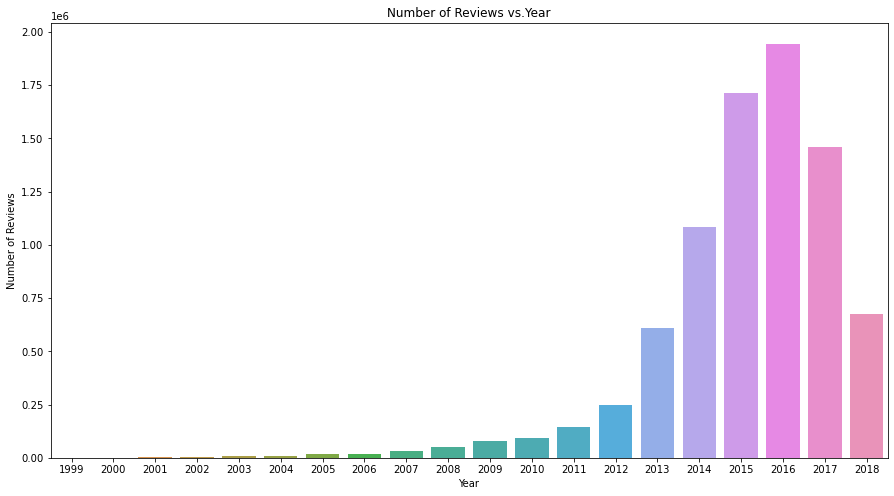

In [14]:
# extract year
review_df['reviewYear'] = review_df['reviewTime'].str.extract(r'(\d{4})')
# sort dataframe by year for plotting purpose
review_df_sorted_by_year = review_df.sort_values("reviewYear")
# plot
plt.figure(figsize=(15,8))
ax = sns.countplot(x="reviewYear", data=review_df_sorted_by_year)
ax.set_title("Number of Reviews vs.Year")
ax.set_ylabel("Number of Reviews")
ax.set_xlabel("Year")

Distribution of total Number of Purchases for Each User

In [18]:
num_of_purchase = review_df[['reviewerID', 'overall']].groupby('reviewerID').count()

Text(0.5, 0, 'Total Number of Purchase')

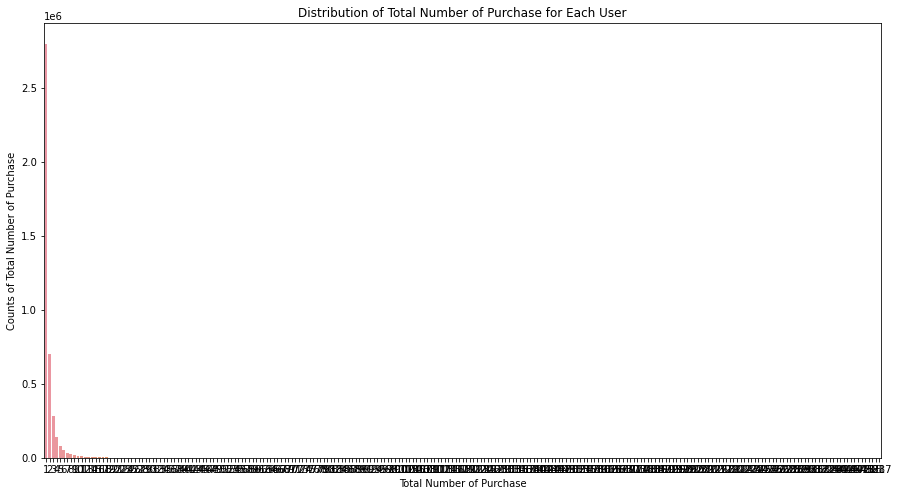

In [32]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x=num_of_purchase["overall"])
ax.set_title("Distribution of Total Number of Purchase for Each User")
ax.set_ylabel("Counts of Total Number of Purchase")
ax.set_xlabel("Total Number of Purchase")

Text(0.5, 0, 'Total Number of Purchase')

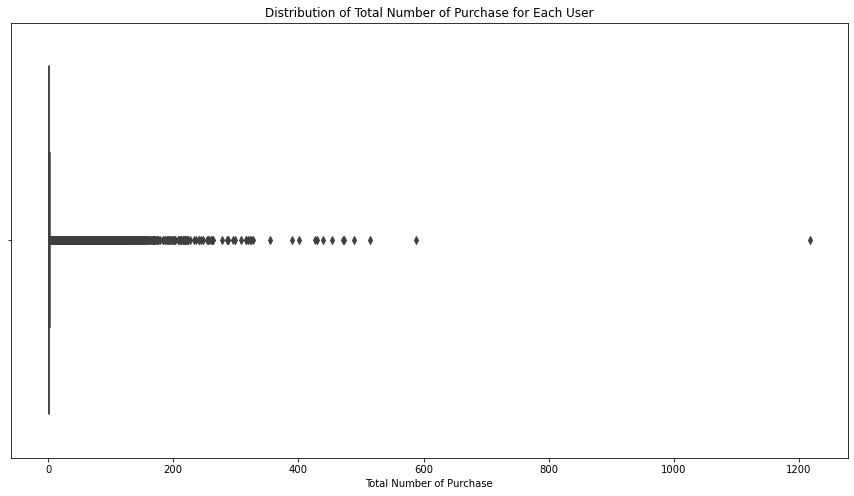

In [24]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x=num_of_purchase["overall"])
ax.set_title("Distribution of Total Number of Purchase for Each User")
ax.set_xlabel("Total Number of Purchase")

In [25]:
num_of_purchase.describe()

,overall
count,4.204994e+06
mean,1.950355e+00
std,3.178670e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,2.000000e+00
max,1.217000e+03


In [35]:
num_of_purchase_less = num_of_purchase[num_of_purchase['overall'] <= 10]

Text(0.5, 0, 'Total Number of Purchase')

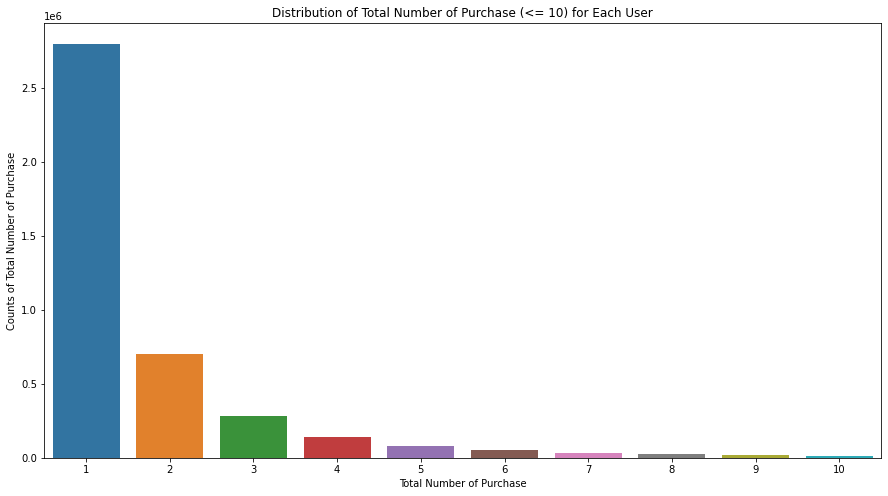

In [37]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x=num_of_purchase_less["overall"])
ax.set_title("Distribution of Total Number of Purchase (<= 10) for Each User")
ax.set_ylabel("Counts of Total Number of Purchase")
ax.set_xlabel("Total Number of Purchase")

Distribution of Avg Rating of Purchases for Each User

In [26]:
avg_of_rating = review_df[['reviewerID', 'overall']].groupby('reviewerID').mean()

Text(0.5, 0, 'Average Rating')

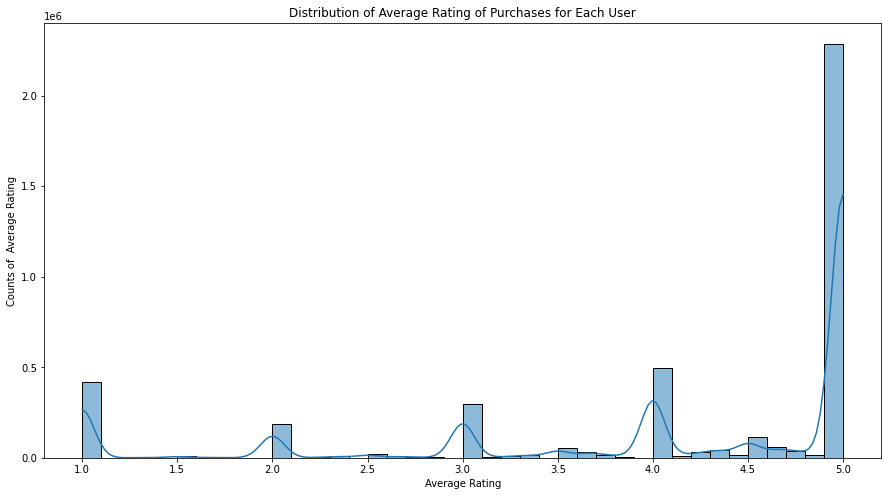

In [30]:
plt.figure(figsize=(15,8))
ax = sns.histplot(x='overall', data=avg_of_rating, bins=40, kde=True)
ax.set_title("Distribution of Average Rating of Purchases for Each User")
ax.set_ylabel("Counts of  Average Rating")
ax.set_xlabel("Average Rating")